# Recommender System :- book

In [3]:
import pandas as pd
import numpy as np

### Check out the data

In [7]:
book = pd.read_csv(r'C:\Users\PRANAV\Desktop\lms\Recommendation system\book.csv', encoding='unicode_escape')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [9]:
ratings_mean_count = pd.DataFrame(book.groupby('Book.Title')['Book.Rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(book.groupby('Book.Title')['Book.Rating'].count())
ratings_mean_count.head()

,Book.Rating,rating_counts
Book.Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


### EDA

C:\Users\PRANAV\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


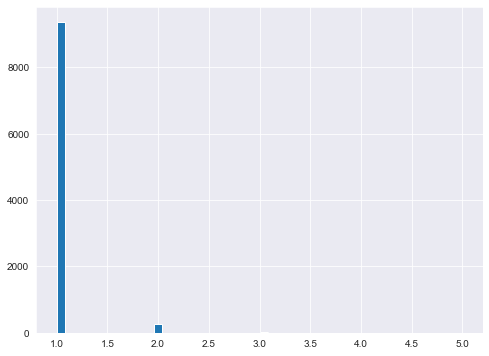

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

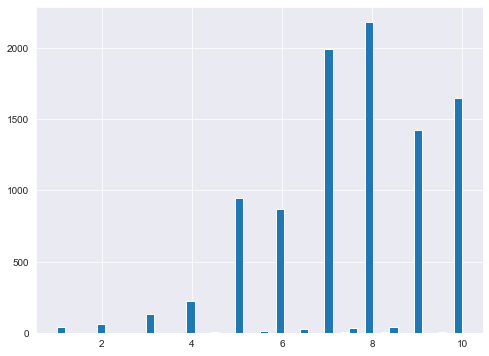

In [11]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Book.Rating'].hist(bins=50)

In [12]:
pivoted_book = book.pivot_table(index = 'User.ID', columns= 'Book.Title', values = 'Book.Rating').reset_index(drop = True)
pivoted_book

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pivoted_book.index = book['User.ID'].unique()

In [14]:
pivoted_book.fillna(book['Book.Rating'].mean(), inplace=True)

In [15]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [16]:
user_sim = 1- pairwise_distances(pivoted_book.values, metric='cosine')

C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
C:\Users\PRANAV\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


In [17]:
book3 = pd.DataFrame(user_sim)
book3.index = book['User.ID'].unique()
book3.columns = book['User.ID'].unique()

In [18]:
book3

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.000000,0.999969,0.999969,0.999966,0.999957,0.999970,0.999944,0.999971,0.999971,0.999964,...,0.999966,0.999955,0.999971,0.999947,0.999967,0.999971,0.999970,0.999929,0.999971,0.999968
276729,0.999969,1.000000,0.999996,0.999992,0.999984,0.999996,0.999970,0.999997,0.999997,0.999991,...,0.999992,0.999982,0.999998,0.999974,0.999993,0.999998,0.999996,0.999955,0.999998,0.999994
276736,0.999969,0.999996,1.000000,0.999992,0.999984,0.999996,0.999970,0.999997,0.999997,0.999991,...,0.999992,0.999982,0.999998,0.999974,0.999993,0.999998,0.999996,0.999955,0.999998,0.999994
276737,0.999966,0.999992,0.999992,1.000000,0.999981,0.999993,0.999967,0.999994,0.999994,0.999987,...,0.999989,0.999979,0.999994,0.999971,0.999990,0.999994,0.999993,0.999952,0.999994,0.999991
276744,0.999957,0.999984,0.999984,0.999981,1.000000,0.999984,0.999959,0.999986,0.999986,0.999979,...,0.999981,0.999970,0.999986,0.999962,0.999981,0.999986,0.999984,0.999943,0.999986,0.999982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.999971,0.999998,0.999998,0.999994,0.999986,0.999998,0.999973,1.000000,1.000000,0.999993,...,0.999994,0.999984,1.000000,0.999976,0.999995,1.000000,0.999998,0.999957,1.000000,0.999996
162109,0.999970,0.999996,0.999996,0.999993,0.999984,0.999996,0.999971,0.999998,0.999998,0.999991,...,0.999993,0.999982,0.999998,0.999974,0.999993,0.999998,1.000000,0.999955,0.999998,0.999995
162113,0.999929,0.999955,0.999955,0.999952,0.999943,0.999955,0.999930,0.999957,0.999957,0.999950,...,0.999952,0.999941,0.999957,0.999933,0.999952,0.999957,0.999955,1.000000,0.999957,0.999954
162121,0.999971,0.999998,0.999998,0.999994,0.999986,0.999998,0.999973,1.000000,1.000000,0.999993,...,0.999994,0.999984,1.000000,0.999976,0.999995,1.000000,0.999998,0.999957,1.000000,0.999996


In [19]:
np.fill_diagonal(user_sim, 0)

In [20]:
book3.idxmax(axis = 1)

276726    276808
276729    278465
276736    278465
276737    277235
276744    276904
           ...  
162107    276755
162109    276755
162113       780
162121    276912
162129    276755
Length: 2182, dtype: int64

In [21]:
user1 = book[book['User.ID'] == 276726]
user2 = book[book['User.ID'] == 276808]
user3 = book[book['User.ID'] == 276729]
user4 = book[book['User.ID'] == 278465]

In [27]:
pd.merge(user1, user2, on= 'Book.Title', how= 'outer').T

,0,1
Unnamed: 0_x,1.0,NaN
User.ID_x,276726.0,NaN
Book.Title,Classical Mythology,Pride and Prejudice
Book.Rating_x,5.0,NaN
Unnamed: 0_y,NaN,42.0
User.ID_y,NaN,276808.0
Book.Rating_y,NaN,10.0


In [25]:
pd.merge(user3, user4, on='Book.Title', how = 'outer').T

,0,1,2
Unnamed: 0_x,2.0,3.0,NaN
User.ID_x,276729.0,276729.0,NaN
Book.Title,Clara Callan,Decision in Normandy,The Complete Idiot's Guide to Knitting &amp; C...
Book.Rating_x,3.0,6.0,NaN
Unnamed: 0_y,NaN,NaN,2046.0
User.ID_y,NaN,NaN,278465.0
Book.Rating_y,NaN,NaN,10.0
